In [2]:
import numpy as np 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
errors = {}
rmse = {}
siesta = {}
rmse_siesta = {}
n_mol = 2
for name in ['mull','descr','atomic']:
    
    errors[name] = np.genfromtxt('/gpfs/scratch/smdick/force_test/dimer/md_siesta_{}/errors.dat'.format(name),
                                 delimiter = ',').reshape(-1,n_mol,3,3)
    siesta[name] = np.genfromtxt('/gpfs/scratch/smdick/force_test/dimer/md_siesta_{}/errors_siesta.dat'.format(name),
                                 delimiter = ',').reshape(-1,n_mol,3,3)
    rms = []
    for e in errors[name]:
        rms.append(np.sqrt(np.mean(e.flatten()**2)))
    rmse[name] = rms
    
    rms = []
    for e in siesta[name]:
        rms.append(np.sqrt(np.mean(e.flatten()**2)))
    rmse_siesta[name] = rms


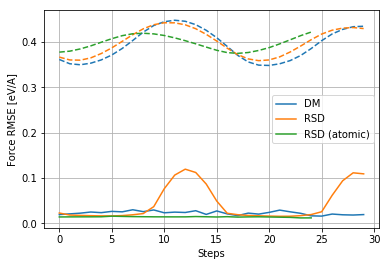

In [13]:
for i, (key, name) in enumerate(zip(rmse,['DM', 'RSD', 'RSD (atomic)'])):
    plot(rmse[key][:30], color = 'C{}'.format(i), label = name)
    plot(rmse_siesta[key][:30], color = 'C{}'.format(i), ls = '--')
legend()
grid()    
xlabel('Steps')
ylabel('Force RMSE [eV/A]');
savefig('../figs/force_error_dimer.pdf')
savefig('../figs/force_error_dimer.eps')

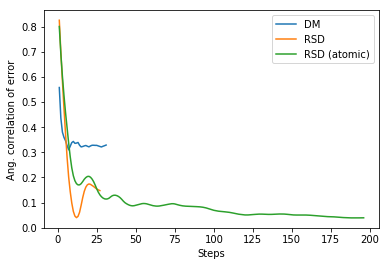

In [8]:
#Error correlation
for i, (key, name) in enumerate(zip(rmse,['DM', 'RSD', 'RSD (atomic)'])):
    errors_normed = errors[key].reshape(-1,3)
    errors_normed = errors_normed/np.tile(np.linalg.norm(errors_normed, axis = 1).reshape(-1,1), [1,3])
    errors_normed = errors_normed.reshape(errors[key].shape)
    corr_list = []
    corr = []
    for dt in range(1,len(errors_normed) - 2):
        for i, e in enumerate(errors_normed[dt:]):
            corr.append(np.einsum('ijk,ijk->ij',e,errors_normed[i])[0,0])
        corr_list.append(np.mean(corr))
    plot(range(1,len(errors_normed)-2), corr_list, label = name)
legend()
xlabel('Steps')
ylabel('Ang. correlation of error')
savefig('../figs/force_ang_corr.pdf')
savefig('../figs/force_ang_corr.eps')